## Problem statement

Abstract: The data is related with direct marketing campaigns (phone calls) of a insurance institution. The classification goal is to predict if the client will buy a new insurance plan (variable Client_Subscribed).




## Data Description

Data Set Information: The data is related with direct marketing campaigns of a insurance institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (term insurance) would be ('yes') or not ('no') subscribed.



Attribute Information: Insurance client data:

Age (numeric)

Job: Type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)

Education(categorical: 'Basic', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

Default_Premium: has premium in default? (categorical: 'no', 'yes', 'unknown')

Health_Insurance: has health insurance? (categorical: 'no', 'yes', 'unknown')

General_Insurance: has general insurance? (categorical: 'no', 'yes', 'unknown')

Related with the last contact of the current campaign:

Contact: contact communication type (categorical: 'cellular','telephone')

Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

Last_Contact_Day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

Last_Contact_Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then Client_Subscribed='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:

Contacts_During_Campaign: number of contacts performed during this campaign and for this client (numeric, includes the last contact)

Previous_Contact_Days: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means the client was not previously contacted)

Contacts_Before_Campaign: number of contacts performed before this campaign and for this client (numeric)

Previous_outcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') Social and economic context attributes

Employment_Rates: employment variation rate - quarterly indicator (numeric)

Price_Variation: consumer price index - monthly indicator (numeric)

Consumer_Confidence_Index: consumer confidence index - monthly indicator (numeric)

Interest_Rate: Interest Rate - annual percentage rate (numeric)

No_Employees: number of employees - quarterly indicator (numeric)

Output variable (desired target):

Client_Subscribed - has the client will buy a new insurance plan? (binary: 'yes', 'no')


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load Data

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
df_bank = pd.read_csv('/content/drive/My Drive/Python_Stats/Decision_Trees_and_Random_Forests/2_In-class Exercise/Dataset/Insurance_Marketing.csv',header=0)
print(df_bank .shape)
print(list(df_bank .columns))

(41188, 21)
['Age', 'Job', 'Marital', 'Qualification', 'Default_Premium', 'Health_Insurance', 'General_Insurance', 'Contact', 'Month', 'Last_Contact_Day', 'Last_Contact_Duration', 'Contacts_During_Campaign', 'Previous_Contact_Days', 'Contacts_Before_Campaign', 'Previous_Outcome', 'Employement_Rates', 'Price_Variation', 'Consumer_Confidence_Index', 'Insurance_Rate', 'No_Employees', 'Client_Subscribed']


In [ ]:
df_bank.head(10)

,Age,Job,Marital,Qualification,Default_Premium,Health_Insurance,General_Insurance,Contact,Month,Last_Contact_Day,Last_Contact_Duration,Contacts_During_Campaign,Previous_Contact_Days,Contacts_Before_Campaign,Previous_Outcome,Employement_Rates,Price_Variation,Consumer_Confidence_Index,Insurance_Rate,No_Employees,Client_Subscribed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,94.159686,-38.173679,3.543298,5074.493963,0
1,57,7,1,1,1,0,0,1,6,1,149,1,999,0,1,1.1,93.374479,-33.312428,6.013585,5125.221264,0
2,37,7,1,1,0,2,0,1,6,1,226,1,999,0,1,1.1,94.100629,-51.947349,2.784063,5205.455324,0
3,40,0,1,0,0,0,0,1,6,1,151,1,999,0,1,1.1,92.772613,-35.624584,4.459237,5096.139930,0
4,56,7,1,1,0,0,2,1,6,1,307,1,999,0,1,1.1,93.241248,-33.492147,3.988744,5112.681264,0
5,45,7,1,0,1,0,0,1,6,1,198,1,999,0,1,1.1,94.760295,-38.577362,6.058114,5153.268354,0
6,59,0,1,3,0,0,0,1,6,1,139,1,999,0,1,1.1,93.625095,-33.671375,3.896024,5250.583878,0
7,41,1,1,5,1,0,0,1,6,1,217,1,999,0,1,1.1,93.649945,-44.549934,6.820409,5064.645471,0
8,24,9,2,3,0,2,0,1,6,1,380,1,999,0,1,1.1,93.849526,-40.052307,3.056284,5166.674781,0
9,25,7,2,1,0,2,0,1,6,1,50,1,999,0,1,1.1,93.456417,-37.959477,3.648408,5193.403261,0


In [ ]:
df_bank.shape

(41188, 21)

In [ ]:
df_bank.info

<bound method DataFrame.info of        Age  Job  Marital  ...  Insurance_Rate  No_Employees  Client_Subscribed
0       56    3        1  ...        3.543298   5074.493963                  0
1       57    7        1  ...        6.013585   5125.221264                  0
2       37    7        1  ...        2.784063   5205.455324                  0
3       40    0        1  ...        4.459237   5096.139930                  0
4       56    7        1  ...        3.988744   5112.681264                  0
...    ...  ...      ...  ...             ...           ...                ...
41183   73    5        1  ...        3.115662   5029.956789                  1
41184   46    1        1  ...        4.819712   5115.011780                  0
41185   56    5        1  ...        2.872091   5159.630226                  0
41186   44    9        1  ...        2.170333   5210.336130                  1
41187   74    5        1  ...        4.582931   5203.077670                  0

[41188 rows x 21 co

In [ ]:
df_bank.dtypes

Age                            int64
Job                            int64
Marital                        int64
Qualification                  int64
Default_Premium                int64
Health_Insurance               int64
General_Insurance              int64
Contact                        int64
Month                          int64
Last_Contact_Day               int64
Last_Contact_Duration          int64
Contacts_During_Campaign       int64
Previous_Contact_Days          int64
Contacts_Before_Campaign       int64
Previous_Outcome               int64
Employement_Rates            float64
Price_Variation              float64
Consumer_Confidence_Index    float64
Insurance_Rate               float64
No_Employees                 float64
Client_Subscribed              int64
dtype: object

## Exploratory data analysis

Let's check, is there any missing value in the dataset?

In [ ]:
df_bank.isnull().sum()

Age                          0
Job                          0
Marital                      0
Qualification                0
Default_Premium              0
Health_Insurance             0
General_Insurance            0
Contact                      0
Month                        0
Last_Contact_Day             0
Last_Contact_Duration        0
Contacts_During_Campaign     0
Previous_Contact_Days        0
Contacts_Before_Campaign     0
Previous_Outcome             0
Employement_Rates            0
Price_Variation              0
Consumer_Confidence_Index    0
Insurance_Rate               0
No_Employees                 0
Client_Subscribed            0
dtype: int64

In [ ]:
df_bank.corr().style.background_gradient()

,Age,Job,Marital,Qualification,Default_Premium,Health_Insurance,General_Insurance,Contact,Month,Last_Contact_Day,Last_Contact_Duration,Contacts_During_Campaign,Previous_Contact_Days,Contacts_Before_Campaign,Previous_Outcome,Employement_Rates,Price_Variation,Consumer_Confidence_Index,Insurance_Rate,No_Employees,Client_Subscribed
Age,1.000000,0.001250,-0.389753,-0.057766,0.164965,-0.001603,-0.007368,0.007021,-0.024877,-0.017572,-0.000866,0.004594,-0.034369,0.024365,0.019750,-0.000371,0.006562,0.000074,-0.005903,-0.001038,0.030399
Job,0.001250,1.000000,0.027897,0.118668,-0.028277,0.006962,-0.010209,-0.025132,-0.033213,-0.000844,-0.006490,-0.006923,-0.028468,0.020965,0.011504,-0.008271,0.005623,0.001747,0.006183,0.001640,0.025122
Marital,-0.389753,0.027897,1.000000,0.093078,-0.079450,0.010467,0.005788,-0.054501,-0.007629,0.002202,0.010290,-0.007240,-0.037942,0.038689,0.001912,-0.084210,0.008624,0.006011,0.006604,-0.003893,0.046203
Qualification,-0.057766,0.118668,0.093078,1.000000,-0.157205,0.015110,0.007039,-0.104552,-0.091951,-0.015212,-0.014593,0.001683,-0.051286,0.038081,0.024687,-0.040076,-0.000087,0.007269,-0.003019,-0.004587,0.063032
Default_Premium,0.164965,-0.028277,-0.079450,-0.157205,1.000000,-0.015815,-0.003782,0.135238,-0.015830,-0.008701,-0.011794,0.032825,0.080062,-0.102416,0.023417,0.203263,0.004675,-0.000145,0.002874,-0.000482,-0.099352
Health_Insurance,-0.001603,0.006962,0.010467,0.015110,-0.015815,1.000000,0.044296,-0.082186,-0.018141,0.003339,-0.007658,-0.011010,-0.010551,0.021314,-0.011783,-0.060196,-0.000129,-0.002241,0.005434,-0.006501,0.011552
General_Insurance,-0.007368,-0.010209,0.005788,0.007039,-0.003782,0.044296,1.000000,-0.008556,-0.005705,-0.009344,-0.000916,0.005166,0.000345,-0.001327,-0.001511,0.001849,0.005772,0.005350,0.002079,-0.011285,-0.004909
Contact,0.007021,-0.025132,-0.054501,-0.104552,0.135238,-0.082186,-0.008556,1.000000,0.276565,-0.009575,-0.026657,0.077368,0.117970,-0.212848,0.118744,0.393584,0.002261,-0.005934,0.002565,0.002201,-0.144773
Month,-0.024877,-0.033213,-0.007629,-0.091951,-0.015830,-0.018141,-0.005705,0.276565,1.000000,0.027677,0.003690,-0.062059,-0.047891,0.103157,-0.065012,-0.178782,-0.000674,-0.003334,0.007926,0.007165,-0.006065
Last_Contact_Day,-0.017572,-0.000844,0.002202,-0.015212,-0.008701,0.003339,-0.009344,-0.009575,0.027677,1.000000,0.021950,-0.038288,-0.009531,-0.004102,0.018732,0.033245,0.001714,0.006039,0.005699,0.010741,0.015967


There is no missing value in the dataset.

## Client  Subscribed

In [ ]:
df_bank['Client_Subscribed'].value_counts()

0    36548
1     4640
Name: Client_Subscribed, dtype: int64

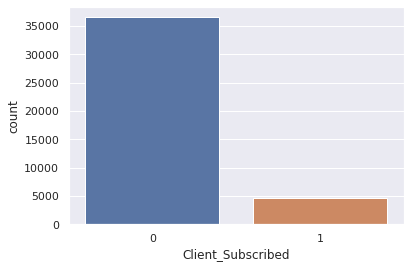

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.countplot(x='Client_Subscribed',data=df_bank)
plt.show()
plt.savefig('count_plot')

There are 36548 clients who did not subscribe to the term policy and 4640 clients who subscribe to the term policy

## Let's compare "Job" and "Client_Subscribed"

Text(0, 0.5, 'The frequency of clients')

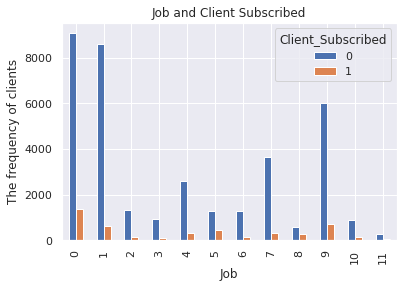

In [ ]:
%matplotlib inline
pd.crosstab(df_bank.Job,df_bank.Client_Subscribed).plot(kind='bar')
plt.title('Job and Client Subscribed')
plt.xlabel('Job')
plt.ylabel('The frequency of clients')

The frequency of clients who subscribe to the term insurance can be depend on the job title. Thus, the job title can be a good predictor of the outcome variable.

## Let's compare "Marital" and "Client_Subscribed"

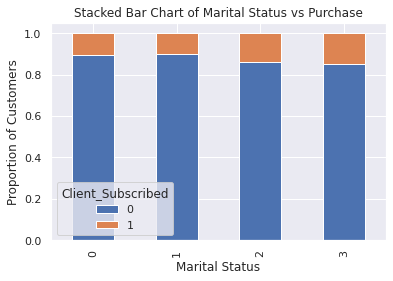

In [ ]:
table=pd.crosstab(df_bank.Marital,df_bank.Client_Subscribed)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

Hard to see, but the marital status does not seem a strong predictor for the outcome variable.

## Let's compare "Qualification" and "Client_Subscribed"

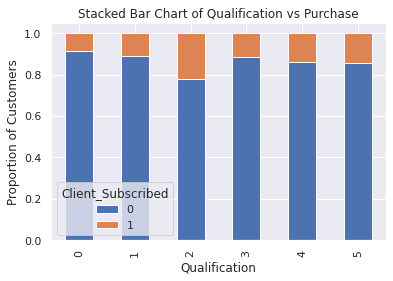

In [ ]:
table=pd.crosstab(df_bank.Qualification,df_bank.Client_Subscribed)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Qualification vs Purchase')
plt.xlabel('Qualification')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

Qualification seems a good predictor of the outcome variable.

## Let's compare "Last_Contact_Day" and "Client_Subscribed"

Text(0, 0.5, 'Frequency of Purchase')

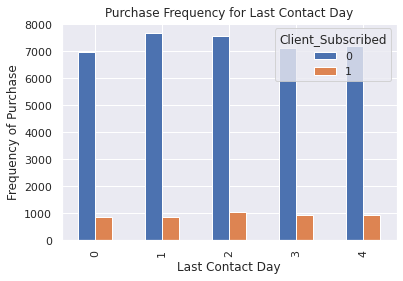

In [ ]:
pd.crosstab(df_bank.Last_Contact_Day,df_bank.Client_Subscribed).plot(kind='bar')
plt.title('Purchase Frequency for Last Contact Day')
plt.xlabel('Last Contact Day')
plt.ylabel('Frequency of Purchase')


Last contact day may not be a good predictor of the outcome

## Let's compare "Month" and "Client_Subscribed"

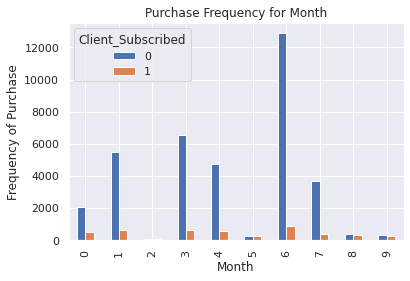

In [ ]:
pd.crosstab(df_bank.Month,df_bank.Client_Subscribed).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

Month might be a good predictor of the outcome variable

## Let's visualize "Age"

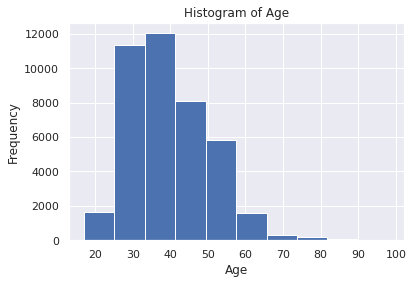

In [ ]:
df_bank.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

The most of the customers of the bank in this dataset are in the age range of 30-40.

## Let's compare "Previous_Outcome" and "Client_Subscribed"

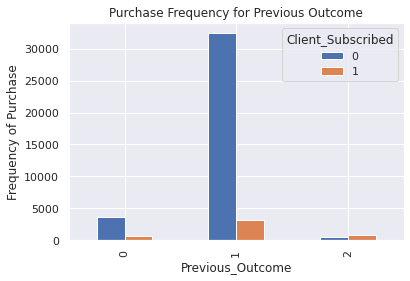

In [ ]:
pd.crosstab(df_bank.Previous_Outcome,df_bank.Client_Subscribed).plot(kind='bar')
plt.title('Purchase Frequency for Previous Outcome')
plt.xlabel('Previous_Outcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

Previous outcome seems to be a good predictor of the outcome variable.

Let's build a model to identify the important variables to predict if the client will buy a new insurance plan.


## Input and output features

In [ ]:
#input and output features
X = df_bank.drop("Client_Subscribed",axis=1).values
y = df_bank.loc[:,"Client_Subscribed"].values

## Implementing the model


## Splitting the dataset into the Training set and Test set


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

## Model Development

In [ ]:
# Fitting Random forest classification to the training set
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Create Random forest model
randomforest_model = RandomForestClassifier(n_estimators=100,random_state=0)

In [ ]:
#Fit the random forest models on training data
randomforest_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Predicting the test set results and caculating the accuracy

In [ ]:
# Predicting the Test set results
pred_rf = randomforest_model.predict(X_test)

In [ ]:
print('Accuracy of Random forest classifier on train set: {:.2f}'.format(randomforest_model.score(X_train, y_train)))

Accuracy of Random forest classifier on train set: 1.00


In [ ]:
print('Accuracy of Random forest classifier on test set: {:.2f}'.format(randomforest_model.score(X_test, y_test)))

Accuracy of Random forest classifier on test set: 0.91


The training and testing accuracy show the model leads to overfitting.

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

print("Confusion matrix for Random forest:")
confusion_matrix_rf = confusion_matrix(y_test, pred_rf)
print(confusion_matrix_rf)


Confusion matrix for Random forest:
[[10654   311]
 [  797   595]]


True Negative is 10654 that means 10654 observations are correctly predicted as 0.

False Positive is 311 that means 311 observations are wrongly predicted as 1.

False Negative is 797 that means 797 observations are wronly predicted as 0.

True Positive is 595 that 595 observations are correctly predicted as 1.

## Classification report

In [ ]:
from sklearn.metrics import classification_report
print("Classification report for Random forest model:")
print(classification_report(y_test, pred_rf))

Classification report for Random forest model:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10965
           1       0.66      0.43      0.52      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.70      0.73     12357
weighted avg       0.90      0.91      0.90     12357



#### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

## ROC Curve

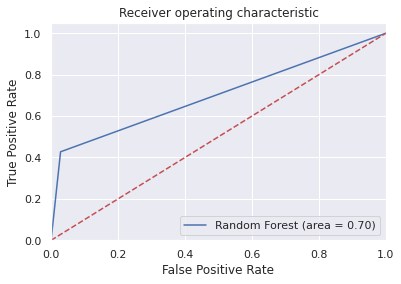

In [ ]:
#import metrics from sklearn to calculate auc score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


#Calculating false positive rate and true positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred_rf)
    
#Calculating AUC score
roc_auc = auc(false_positive_rate, true_positive_rate)

# create a figure object
plt.figure()

#plot false positive rate value and true positive rate value and area under curve value
plt.plot(false_positive_rate, true_positive_rate, label='Random Forest (area = %0.2f)' % roc_auc)

#dignal dotted red line
plt.plot([0, 1], [0, 1],'r--')

#x-axis limitation
plt.xlim([0.0, 1.0])

#y-axis limitaion
plt.ylim([0.0, 1.05])

#x-axis label
plt.xlabel('False Positive Rate')

#y-axis label
plt.ylabel('True Positive Rate')

#title for plot
plt.title('Receiver operating characteristic')

#print legend on lower right
plt.legend(loc="lower right")

#save the plot as a image
plt.savefig('Log_ROC')
#print the plot
plt.show()



Roc curve is a plot of true positive rate versus false positive rate. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test. The area under the curve (AUC) is a measure of test accuracy. When AUC is 0.70, it means there is 70% chance that model will be able to distinguish between positive class and negative class


We can observe that the model has given 91% accuracy on test data.

F1 score for "No" is 95% and F1 score for "Yes" is 52%. We have to balance F1 score between "No" and "Yes".

AUC score is 70% which is lower than accuracy value.



We try to tune hyperparameter to increase AUC score.

## Let's learn about hyperparameter tuning for Random forest

### n_estimators
The number of trees in the forest.

### class_weight  
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

### criterion
The function to measure the quality of a split.

### max_depth  
 Maximum  number of levels in each decision tree

### max_features  
Maximum number of features considered for splitting a node

### max_leaf_nodes
Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

### min_impurity_decrease 
A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

###  min_impurity_split 
Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
 
### min_samples_split  
 Minimum number number of data points placed in a node before the node is split

### min_samples_leaf 
Minimum number of data points allowed in a leaf node

### min_weight_fraction_leaf 
The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

### oob_score
Whether to use out-of-bag samples to estimate the generalization accuracy.

### bootstrap 
Whether bootstrap samples are used when building trees. If False, the whole datset is used to build each tree.

### warm_start
When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest

##  Let's check how AUC value changing when the depth of tree change and the increasing number of the estimator

In [ ]:
from sklearn.metrics import roc_curve, auc

max_depths = list(range(1,50))

train_results_max_depth = []
test_results_max_depth = []

for i in max_depths:
    #creata a model
    model_rf = RandomForestClassifier(max_depth=i, n_jobs=-1)
    
    #Fit the model on train and test data
    model_rf.fit(X_train, y_train)
    
    #Prediction on train data set
    train_pred = model_rf.predict(X_train)
    
    #Calculating false positive rate and true positive rate 
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    
    #Calculating AUC score 
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    #Append result to empty train_results list
    train_results_max_depth.append(roc_auc)
    
    #Prediction on test dataset
    y_pred = model_rf.predict(X_test)
    
    #Calculating false positive rate and true positive rate
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    #Calculating AUC score
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    #Append result to empty train_results list
    test_results_max_depth.append(roc_auc)


n_estimator = list(range(10,50))

train_results_n_estimator = []
test_results_n_estimator = []
for i in n_estimator:
    #creata a model
    model_rf = RandomForestClassifier(n_estimators=i, n_jobs=-1)
    
    #Fit the model on train and test data
    model_rf.fit(X_train, y_train)
    
    #Prediction on train data set
    train_pred = model_rf.predict(X_train)
    
    #Calculating false positive rate and true positive rate 
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    
    #Calculating AUC score 
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    #Append result to empty train_results list
    train_results_n_estimator.append(roc_auc)
    
    #Prediction on test dataset
    y_pred = model_rf.predict(X_test)
    
    #Calculating false positive rate and true positive rate
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    #Calculating AUC score
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    #Append result to empty train_results list
    test_results_n_estimator.append(roc_auc)

## Visualize the AUC Scores according to max depth and number of estimator

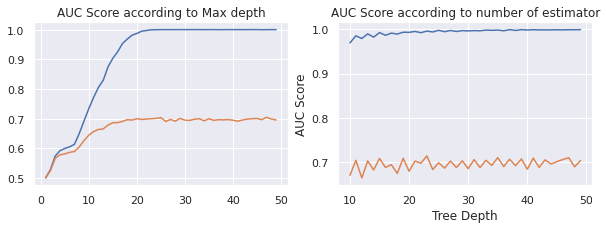

In [ ]:
#Create a figure object
fig = plt.figure(figsize=(10,3))
#Add two subplots to figure
fig_max_depth = fig.add_subplot("121")
fig_n_estimator  = fig.add_subplot("122")

#Add max depth and result to one subplot
fig_max_depth.plot(max_depths, train_results_max_depth)
fig_max_depth.plot(max_depths, test_results_max_depth)
fig_max_depth.title.set_text("AUC Score according to Max depth")

#Add number of estimator and result to one subplot
fig_n_estimator.plot(n_estimator,train_results_n_estimator)
fig_n_estimator.plot(n_estimator,test_results_n_estimator)
fig_n_estimator.title.set_text("AUC Score according to number of estimator")
plt.xlabel('Tree Depth')
plt.ylabel('AUC Score')
plt.show()

From the above plot, we can observe that the model leads to overfitting.

## Training a model with Random search method

In [ ]:
param_grid = {'n_estimators': [100,150,200,250],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [10, 20, 30, 40, 50,None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

In [ ]:
#Ignore the deprecation warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

#import randomized search model
from sklearn.model_selection import RandomizedSearchCV

#Create a decision tree classifier model
randomscv_forest = RandomForestClassifier(random_state=0)

random_search = RandomizedSearchCV(randomscv_forest,param_distributions=param_grid,n_iter=10,cv=10)
#Fit the grid search object on the training dataset
random_search.fit(X_train,y_train)                      


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

## Print best parameter values from random search

In [ ]:
# View the accuracy score
print('Best score for data1:', random_search.best_score_) 

Best score for data1: 0.9132878998461976


In [ ]:
# View the best parameters for the model found using grid search
print('Best min_samples_split:',random_search.best_estimator_.min_samples_split) 
print('Best max_depth:',random_search.best_estimator_.max_depth) 
print('Best max_features:',random_search.best_estimator_.max_features)
print('Best min_samples_leaf:',random_search.best_estimator_.min_samples_leaf)
print('Best n_estimators:',random_search.best_estimator_.n_estimators)
print('Best bootstrap:',random_search.best_estimator_.bootstrap)

Best min_samples_split: 10
Best max_depth: 40
Best max_features: sqrt
Best min_samples_leaf: 4
Best n_estimators: 100
Best bootstrap: False


## Build a Random forest classifier using the best parameter given by the random search method

In [ ]:
#Create a decision tree classifier model
random_forest_model = RandomForestClassifier(n_estimators=100,min_samples_split=10,max_depth=40,max_features='sqrt',bootstrap=False,random_state=0,min_samples_leaf=4)
random_forest_model.fit(X_train,y_train)  

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Prediction on test data by the model given by random search


In [ ]:
# Predicting the Test set results
pred_rm = random_forest_model.predict(X_test)

In [ ]:
print('Accuracy of Decision tree classifier on train set: {:.2f}'.format(random_forest_model.score(X_train, y_train)))

Accuracy of Decision tree classifier on train set: 0.99


In [ ]:
print('Accuracy of Decision tree classifier on test set: {:.2f}'.format(random_forest_model.score(X_test, y_test)))

Accuracy of Decision tree classifier on test set: 0.91


## Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, pred_rm)
print(confusion_matrix)

[[10641   324]
 [  774   618]]




1.   List item

1.   List item

1.   List item
2.   List item


2.   List item


2.   List item


True Negative is 10641 that means 10641 observations are correctly predicted as 0.

False Positive is 324 that means 324 observations are wrongly predicted as 1.

False Negative is 774  that means  774  observations are wronly predicted as 0.

True Positive is 618  that 618 observations are correctly predicted as 1.

## Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_rm))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10965
           1       0.66      0.44      0.53      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.71      0.74     12357
weighted avg       0.90      0.91      0.90     12357



#### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

## ROC curve from sklearn import metrics

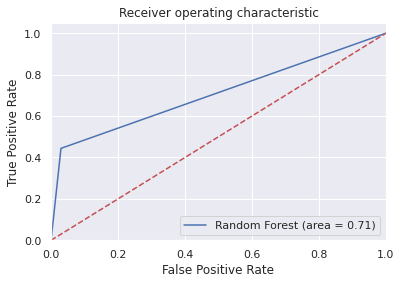

In [ ]:
#import metrics from sklearn to calculate auc score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


#Calculating false positive rate and true positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred_rm)
    
#Calculating AUC score
roc_auc = auc(false_positive_rate, true_positive_rate)

# create a figure object
plt.figure()

#plot false positive rate value and true positive rate value and area under curve value
plt.plot(false_positive_rate, true_positive_rate, label='Random Forest (area = %0.2f)' % roc_auc)

#dignal dotted red line
plt.plot([0, 1], [0, 1],'r--')

#x-axis limitation
plt.xlim([0.0, 1.0])

#y-axis limitaion
plt.ylim([0.0, 1.05])

#x-axis label
plt.xlabel('False Positive Rate')

#y-axis label
plt.ylabel('True Positive Rate')

#title for plot
plt.title('Receiver operating characteristic')

#print legend on lower right
plt.legend(loc="lower right")

#save the plot as a image
plt.savefig('Log_ROC')
#print the plot
plt.show()



Roc curve is a plot of true positive rate versus false positive rate. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test. The area under the curve (AUC) is a measure of test accuracy. When AUC is 0.71, it means there is 71% chance that model will be able to distinguish between positive class and negative class


We can observe that the model has given 91% accuracy on test data.

F1 score for "No" is 95% and F1 score for "Yes" is 52%. We have to balance F1 score between "No" and "Yes".




## View Feature Importance




In [ ]:
importances_features =random_forest_model.feature_importances_

## Visualize Feature Importance


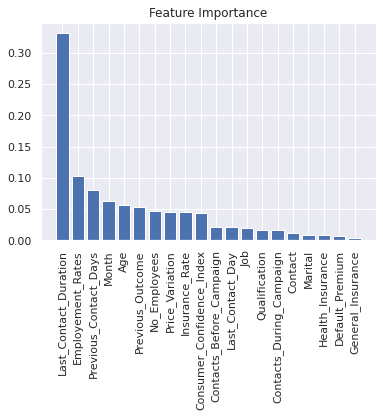

In [ ]:
# Sort feature importances in descending order
indices = np.argsort(importances_features)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [df_bank.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances_features[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()



The above plot show feature importance to predict if the client will subscribe to a new insurance plan (variable Client_Subscribed).

Random forest classifier has an accuracy of 91% when predicting the client will buy a new insurance plan.

# XGBoost

## Model Development

In [ ]:
from xgboost import XGBClassifier
#Create XGboost model
xgb_model = XGBClassifier()

# fit model on training data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## Predicting the test set results and caculating the accuracy

In [ ]:
pred_xgb = xgb_model.predict(X_test)

In [ ]:
print('Accuracy of Xgboost classifier on train set: {:.2f}'.format(xgb_model.score(X_train, y_train)))

Accuracy of Xgboost classifier on train set: 0.92


In [ ]:
print('Accuracy of Xgboost classifier on test set: {:.2f}'.format(xgb_model.score(X_test, y_test)))


Accuracy of Xgboost classifier on test set: 0.91


## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix for XGboost forest:")
confusion_matrix_xgb = confusion_matrix(y_test, pred_xgb)
print(confusion_matrix_xgb)

Confusion matrix for XGboost forest:
[[10637   328]
 [  788   604]]


True Negative is 10637 that means 10637 observations are correctly predicted as 0.

False Positive is 328 that means 328 observations are wrongly predicted as 1.

False Negative is 788 that means 788 observations are wronly predicted as 0.

True Positive is 604 that 604 observations are correctly predicted as 1.


## Classification report

In [ ]:
from sklearn.metrics import classification_report
print("Classification report for XGboost model:")
print(classification_report(y_test, pred_xgb))

Classification report for XGboost model:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10965
           1       0.65      0.43      0.52      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.70      0.73     12357
weighted avg       0.90      0.91      0.90     12357



#### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

## ROC Curve

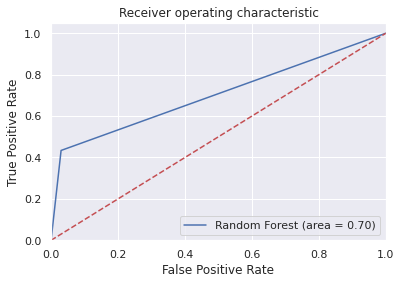

In [ ]:
#import metrics from sklearn to calculate auc score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


#Calculating false positive rate and true positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred_xgb)
    
#Calculating AUC score
roc_auc = auc(false_positive_rate, true_positive_rate)

# create a figure object
plt.figure()

#plot false positive rate value and true positive rate value and area under curve value
plt.plot(false_positive_rate, true_positive_rate, label='Random Forest (area = %0.2f)' % roc_auc)

#dignal dotted red line
plt.plot([0, 1], [0, 1],'r--')

#x-axis limitation
plt.xlim([0.0, 1.0])

#y-axis limitaion
plt.ylim([0.0, 1.05])

#x-axis label
plt.xlabel('False Positive Rate')

#y-axis label
plt.ylabel('True Positive Rate')

#title for plot
plt.title('Receiver operating characteristic')

#print legend on lower right
plt.legend(loc="lower right")

#save the plot as a image
plt.savefig('Log_ROC')
#print the plot
plt.show()



Roc curve is a plot of true positive rate versus false positive rate. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test. The area under the curve (AUC) is a measure of test accuracy. When AUC is 0.70, it means there is 70% chance that model will be able to distinguish between positive class and negative class




The above plot show feature importance to predict if the client will subscribe a new insurance plan (variable Client_Subscribed).

XGBoost classifier has an accuracy of 91% when predicting the client will buy a new insurance plan

## Let's learn about hyperparameter tuning for XGboost

### booster
Select the type of model to run at each iteration. It has 2 options: 

gbtree: tree-based models,
gblinear: linear models

### silent
Silent mode is activated is set to 1, i.e. no running messages will be printed.
It’s generally good to keep it 0 as the messages might help in understanding the model

### nthread
This is used for parallel processing and number of cores in the system should be entered

### eta 
Makes the model more robust by shrinking the weights on each step.
Typical final values to be used: 0.01-0.2

### max_depth  
 Maximum  number of levels in each decision tree
 
### min_child_weight
Minimum sum of weights of all observations required in a child.

### max_leaf_nodes
Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

### gamma
A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.


### max_delta_step
In maximum delta step, we allow each tree’s weight estimation to be. If the value is set to 0, it means there is no constraint. If it is set to a positive value, it can help to make the update step more conservative.

 
### subsample 
Denotes the fraction of observations to be randomly samples for each tree.
Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting.
Typical values: 0.5-1

### colsample_bytree
Similar to max_features in GBM. Denotes the fraction of columns to be randomly samples for each tree.

### colsample_bylevel
Denotes the subsample ratio of columns for each split, in each level

### lambda 
L2 regularization term on weights (analogous to Ridge regression)

### alpha
L1 regularization term on weight (analogous to Lasso regression)

### scale_pos_weight
A value greater than 0 should be used in case of high class imbalance as it helps in faster convergence.

### objective

This defines the loss function to be minimized. Mostly used values are

binary:logistic

multi:softmax

multi:softprob


### eval_metric
rmse – root mean square error

mae – mean absolute error

logloss – negative log-likelihood

error – Binary classification error rate (0.5 threshold)

merror – Multiclass classification error rate

mlogloss – Multiclass logloss

auc: Area under the curve


### seed
The random number seed.

## Training a model with Random search method

In [ ]:
param_grid = { 'min_child_weight':range(1,6,2),
               'max_depth':[4,5,6],
               'gamma':[i/10.0 for i in range(0,5)],
               'subsample':[i/10.0 for i in range(6,10)],
               'colsample_bytree':[i/10.0 for i in range(6,10)],
               'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
               'scale_pos_weight':range(1,10,2)}


In [ ]:
#Ignore the deprecation warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

#import randomized search model
from sklearn.model_selection import RandomizedSearchCV

#Create a XGboost classifier model
xgb_model = XGBClassifier()

random_search = RandomizedSearchCV(xgb_model,param_distributions=param_grid,n_iter=20,cv=10)
#Fit the grid search object on the training dataset
random_search.fit(X_train,y_train)  


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, s...
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                        

## Print best parameter values from random search


In [ ]:
print('Best score for data1:', random_search.best_score_) 

Best score for data1: 0.9128023426822208


In [ ]:
# View the best parameters for the model found using grid search
print('Best min_samples_split:',random_search.best_estimator_.min_child_weight) 
print('Best max_depth:',random_search.best_estimator_.max_depth) 
print('Best gamma:',random_search.best_estimator_.gamma) 
print('Best subsample:',random_search.best_estimator_.subsample)
print('Best colsample_bytree:',random_search.best_estimator_.colsample_bytree)
print('Best reg_alpha:',random_search.best_estimator_.reg_alpha)

Best min_samples_split: 1
Best max_depth: 4
Best gamma: 0.4
Best subsample: 0.7
Best colsample_bytree: 0.6
Best reg_alpha: 1


## Build an XGBoost classifier using the best parameter given by the random search method

In [ ]:
xgb_model = XGBClassifier(min_samples_split=1,max_depth=4,gamma=0.4,subsample=0.7,colsample_bytree=0.6,reg_alpha=1)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, min_samples_split=1, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=1,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.7, verbosity=1)

## Prediction on test data by the model given by random search

In [ ]:
pred_by_rsm = xgb_model.predict(X_test)

In [ ]:
print('Accuracy of Xgboost classifier on train set: {:.2f}'.format(xgb_model.score(X_train, y_train)))

Accuracy of Xgboost classifier on train set: 0.92


In [ ]:
print('Accuracy of Xgboost classifier on test set: {:.2f}'.format(xgb_model.score(X_test, y_test)))

Accuracy of Xgboost classifier on test set: 0.91


## Confusion Matrix

In [ ]:
print("Confusion matrix for XGboost forest:")
confusion_matrix_xgb = confusion_matrix(y_test, pred_by_rsm)
print(confusion_matrix_xgb)

Confusion matrix for XGboost forest:
[[10623   342]
 [  752   640]]


True Negative is 10623 that means 10623 observations are correctly predicted as 0.

False Positive is 342 that means 342 observations are wrongly predicted as 1.

False Negative is 752 that means 752 observations are wronly predicted as 0.

True Positive is 640that 640 observations are correctly predicted as 1.


## Classification report

In [ ]:
print("Classification report for XGboost model:")
print(classification_report(y_test, pred_by_rsm))

Classification report for XGboost model:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10965
           1       0.65      0.46      0.54      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.71      0.75     12357
weighted avg       0.90      0.91      0.90     12357



## ROC Curve

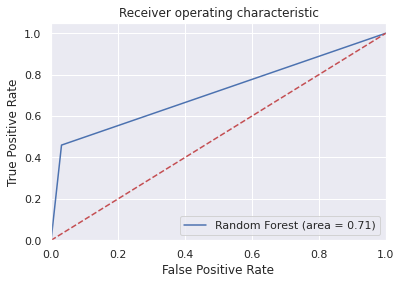

In [ ]:
#import metrics from sklearn to calculate auc score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


#Calculating false positive rate and true positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred_by_rsm)
    
#Calculating AUC score
roc_auc = auc(false_positive_rate, true_positive_rate)

# create a figure object
plt.figure()

#plot false positive rate value and true positive rate value and area under curve value
plt.plot(false_positive_rate, true_positive_rate, label='Random Forest (area = %0.2f)' % roc_auc)

#dignal dotted red line
plt.plot([0, 1], [0, 1],'r--')

#x-axis limitation
plt.xlim([0.0, 1.0])

#y-axis limitaion
plt.ylim([0.0, 1.05])

#x-axis label
plt.xlabel('False Positive Rate')

#y-axis label
plt.ylabel('True Positive Rate')

#title for plot
plt.title('Receiver operating characteristic')

#print legend on lower right
plt.legend(loc="lower right")

#save the plot as a image
plt.savefig('Log_ROC')
#print the plot
plt.show()

Roc curve is a plot of true positive rate versus false positive rate. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test. The area under the curve (AUC) is a measure of test accuracy. When AUC is 0.73, it means there is 73% chance that model will be able to distinguish between positive class and negative class


## View Feature Importance

In [ ]:
importances_features =xgb_model.feature_importances_

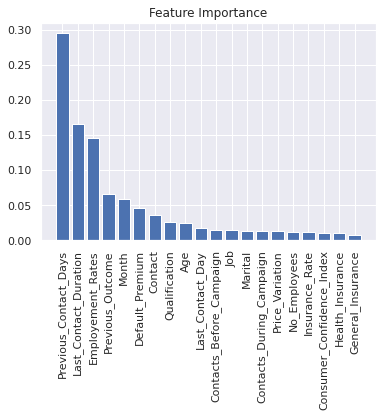

In [ ]:
# Sort feature importances in descending order
indices = np.argsort(importances_features)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [df_bank.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances_features[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

The above plot show feature importance to predict if the client will subscribe to a new insurance plan (variable Client_Subscribed).


XGBoost classifier has an accuracy of 91% when predicting the client will buy a new insurance plan.


# Adaboost

## Model Development

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
#Create Adaboost model
adb_model = AdaBoostClassifier(n_estimators=500,random_state=0)

In [ ]:
#Fit the adaboost model on training data
adb_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=500, random_state=0)

## Predicting the test set results and caculating the accuracy

In [ ]:
pred_adb = adb_model.predict(X_test)

In [ ]:
print('Accuracy of Adaboost classifier on train set: {:.2f}'.format(adb_model.score(X_train, y_train)))

Accuracy of Adaboost classifier on train set: 0.91


In [ ]:
print('Accuracy of Adaboost classifier on test set: {:.2f}'.format(adb_model.score(X_test, y_test)))

Accuracy of Adaboost classifier on test set: 0.91


## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix for Adaboost forest:")
confusion_matrix_adb = confusion_matrix(y_test, pred_adb)
print(confusion_matrix_adb )

Confusion matrix for Adaboost forest:
[[10626   339]
 [  826   566]]


True Negative is 10626 that means 10626 observations are correctly predicted as 0.

False Positive is 339 that means 339 observations are wrongly predicted as 1.

False Negative is 826 that means 826 observations are wronly predicted as 0.

True Positive is 566 that 566 observations are correctly predicted as 1.

## Classification report

In [ ]:
from sklearn.metrics import classification_report
print("Classification report for Adaboost model:")
print(classification_report(y_test, pred_adb))

Classification report for Adaboost model:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10965
           1       0.63      0.41      0.49      1392

    accuracy                           0.91     12357
   macro avg       0.78      0.69      0.72     12357
weighted avg       0.89      0.91      0.90     12357



# ROC Curve

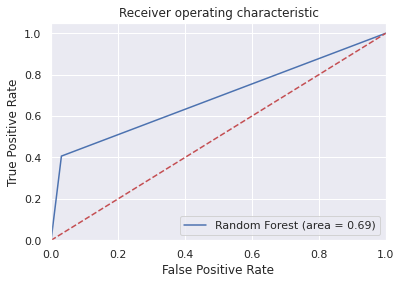

In [ ]:
#import metrics from sklearn to calculate auc score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


#Calculating false positive rate and true positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred_adb)
    
#Calculating AUC score
roc_auc = auc(false_positive_rate, true_positive_rate)

# create a figure object
plt.figure()

#plot false positive rate value and true positive rate value and area under curve value
plt.plot(false_positive_rate, true_positive_rate, label='Random Forest (area = %0.2f)' % roc_auc)

#dignal dotted red line
plt.plot([0, 1], [0, 1],'r--')

#x-axis limitation
plt.xlim([0.0, 1.0])

#y-axis limitaion
plt.ylim([0.0, 1.05])

#x-axis label
plt.xlabel('False Positive Rate')

#y-axis label
plt.ylabel('True Positive Rate')

#title for plot
plt.title('Receiver operating characteristic')

#print legend on lower right
plt.legend(loc="lower right")

#save the plot as a image
plt.savefig('Log_ROC')
#print the plot
plt.show()

Roc curve is a plot of true positive rate versus false positive rate. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test. The area under the curve (AUC) is a measure of test accuracy. When AUC is 0.69, it means there is 69% chance that model will be able to distinguish between positive class and negative class


## View Feature Importance

In [ ]:
importances_features =adb_model.feature_importances_

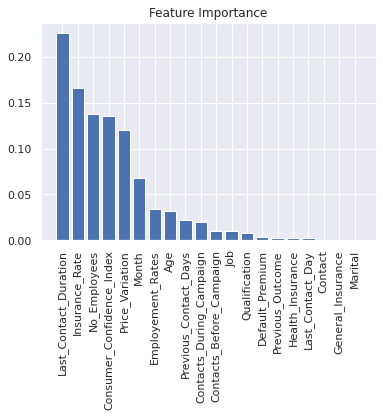

In [ ]:
# Sort feature importances in descending order
indices = np.argsort(importances_features)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [df_bank.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances_features[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

The above plot show feature importance to predict if the client will subscribe to a new insurance plan (variable Client_Subscribed).

Adaboost classifier has an accuracy of 91% when predicting the client will buy a new insurance plan.

# Conclusion

In [ ]:
import pandas as pd

df_accuracy= pd.DataFrame({"Random Forest":{"Accuracy on train data":"99%","Accuracy on test data":"91%","F1 Score for 'No'":"95%","F1 Score for 'Yes'":"53%","AUC Score":"71%"},
                  "XGBoost":{"Accuracy on train data":"94%","Accuracy on test data":"91%","F1 Score for 'No'":"95%","F1 Score for 'Yes'":"55%","AUC Score":"73%"},
                  "Adaboost":{"Accuracy on train data":"91%","Accuracy on test data":"91%","F1 Score for 'No'":"95%","F1 Score for 'Yes'":"49%","AUC Score":"69%"}})

In [ ]:
df_accuracy

,Random Forest,XGBoost,Adaboost
Accuracy on train data,99%,94%,91%
Accuracy on test data,91%,91%,91%
F1 Score for 'No',95%,95%,95%
F1 Score for 'Yes',53%,55%,49%
AUC Score,71%,73%,69%


This dataset is an imbalanced dataset so we consider AUC as our main score.

Since the AUC Score of XGBoost is better than the other two models.
Even the F1 score for 'Yes' is higher in terms of percentage we consider XGBoost as a better model to predict whether the client will buy a new insurance plan or not.

